# test TimeEmbedding


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

from StableDiffusion.TimeEmbedding import TimeEmbedding


device = 'cuda'
timeEmbedding = TimeEmbedding(embeddingDimension=320).to(device)
time = torch.randn(1,320).to(device)
time = timeEmbedding(time)
print(time,time.shape)

/home/aistudio/external-libraries/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[-0.1731, -0.1291, -0.0208,  ...,  0.2765, -0.1940, -0.0560]],
       device='cuda:0', grad_fn=<AddmmBackward0>) torch.Size([1, 1280])


# test Clip

In [4]:
import torch
import transformers 
import numpy as np 
from transformers import CLIPTokenizer
from StableDiffusion.ClipEncoder import ClipEmbedding
device = 'cuda'
prompt = ['a girl walking on a Chrismas street in a snowing day', \
          'a girl sitting by window while snow falls from the sky',\
           'a girl playing with a cat in a snowing day']
promptTokenizer = CLIPTokenizer(vocab_file='./models/vocab.json',merges_file='./models/merges.txt')
promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77)['input_ids']
print(type(promptTokens))
print(promptTokens)  
promptTokens = torch.tensor(promptTokens,dtype=torch.long)
promptTokens = promptTokens.to(device)
print(type(promptTokens))
print(promptTokens.shape)  
clipEmbedding = ClipEmbedding(numVocabularies=49408,numEmbeddings=768,numTokens=77)
clipEmbedding = clipEmbedding.to(device)
tokenEmbedding = clipEmbedding(promptTokens)
print(tokenEmbedding)

<class 'list'>
[[49406, 320, 1611, 3941, 525, 320, 9907, 1412, 2012, 530, 320, 21443, 575, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407], [49406, 320, 1611, 4919, 638, 4879, 1519, 2583, 4778, 633, 518, 2390, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407

# test Vae Encoder 

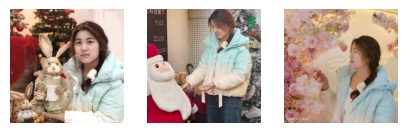

image batch shape: torch.Size([3, 3, 512, 512])
vae encoder output shape torch.Size([3, 4, 64, 64])
0 Conv2d(4, 4, kernel_size=(1, 1), stride=(1, 1)) torch.Size([3, 4, 64, 64])
1 Conv2d(4, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([3, 512, 64, 64])
2 VaeResidualBlock(
  (groupnorm_1): GroupNorm(32, 512, eps=1e-05, affine=True)
  (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (groupnorm_2): GroupNorm(32, 512, eps=1e-05, affine=True)
  (conv_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (residual_layer): Identity()
) torch.Size([3, 512, 64, 64])
3 VaeGlobalSelfAttention(
  (groupnorm): GroupNorm(32, 512, eps=1e-05, affine=True)
  (attention): MHSelfAttention(
    (in_proj): Linear(in_features=512, out_features=1536, bias=True)
    (out_proj): Linear(in_features=512, out_features=512, bias=True)
  )
) torch.Size([3, 512, 64, 64])
4 VaeResidualBlock(
  (groupnorm_1): GroupNorm(32, 512, eps=1e-05, affine=T

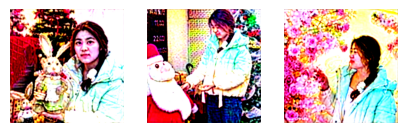

In [5]:

import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
import StableDiffusion.ModelConverter
from StableDiffusion.VaeEncoder import VaeEncoder
from StableDiffusion.VaeDecoder import VaeDecoder
diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cuda')
img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./images/pusiyue_chrismastreet_1024_1024.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread('./images/pusiyue_rose_1024_1024.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
imgList = [img1, img2, img3]
fig, axes = plt.subplots(1, 3, figsize=(5, 5))
for ax, img in zip(axes, imgList):    
    ax.imshow(img)
    ax.axis("off")
plt.show()


with torch.no_grad():

    preprocess = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((512,512)),
                    transforms.ToTensor(),   # (0 255) -> (-1, 1)
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])# 
                    ])
    imgBatch = []
    for img in imgList:
        img = preprocess(img)
        imgBatch.append(img)
    imgBatch = torch.stack(imgBatch)
    print(f'image batch shape: {imgBatch.shape}')
    #  test VaeEncoder 
    device = 'cuda'
    testX = imgBatch
    testX = testX.to(device)
    #inputNoise = torch.randn(3, 4, 64, 64).to(device)
    inputNoise = torch.zeros(3, 4, 64, 64).to(device)
    vaeEncoder = VaeEncoder().to(device)
    vaeEncoder.load_state_dict(diffusionDict['encoder'],strict=True)
    testX = vaeEncoder(testX, inputNoise)
    print(f'vae encoder output shape {testX.shape}')
    vaeDecoder = VaeDecoder().to(device)
    vaeDecoder.load_state_dict(diffusionDict['decoder'])

    testX = vaeDecoder(testX)

    sum = 0 
    for name,parameter in vaeEncoder.named_parameters():
        #print(name, parameter.shape)
        sum = sum + parameter.numel()
    print(f'vae encoder total parameters {sum}')

    sum = 0 
    for name,parameter in vaeDecoder.named_parameters():
        sum = sum + parameter.numel()

    print(f'vae decoder total parameters {sum}')

    fig ,axes = plt.subplots(1, 3, figsize=(5, 5))
    axes = axes.flatten()
    imgsToShow = testX[:3,:3]
    print(imgsToShow.shape)
    for img,axis in zip(imgsToShow,axes ):
        img = img.cpu().detach().permute(1,2,0)
        #img = (img - img.min()) / (img.max() - img.min())
        img = (img +1)/2
        img = img.clamp(0,1)
        axis.imshow(img)
        axis.axis("off")    
    plt.show()

# Unet

In [1]:

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from transformers import CLIPTokenizer
from StableDiffusion.TimeEmbedding import TimeEmbedding
from StableDiffusion.Attention import MHSelfAttention
from StableDiffusion.Attention import MHCrossAttention


class UpScaleTwo(nn.Module):
    def __init__(self,inChannels):
        super(UpScaleTwo,self).__init__()
        self.inChannels = inChannels
        self.upScaleTwo = nn.Upsample(scale_factor=2,mode='nearest')
        self.conv =  nn.Conv2d(in_channels=self.inChannels,out_channels=self.inChannels,kernel_size=3,padding=1)
    def forward(self,inputs):
        x = inputs
        x  = self.upScaleTwo(x)
        x = self.conv(x)
        return x 


class UnetResidualBlock(nn.Module):
    def __init__(self,inChannels,outChannels,timeEmbeddingDimension = 1280):
        super(UnetResidualBlock,self).__init__()
        self.inChannels = inChannels
        self.outChannels = outChannels
        self.timeEmbeddingDimension = timeEmbeddingDimension
        self.silu = nn.SiLU()
        self.groupnorm_feature = nn.GroupNorm(num_groups=32, num_channels=self.inChannels)
        self.conv_feature = nn.Conv2d(in_channels=self.inChannels,out_channels=self.outChannels,kernel_size=3,padding=1)
        self.linear_time = nn.Linear(in_features=self.timeEmbeddingDimension,out_features=self.outChannels)
        self.groupnorm_merged = nn.GroupNorm(num_groups=32, num_channels=self.outChannels)
        self.conv_merged = nn.Conv2d(in_channels=self.outChannels,out_channels=self.outChannels,kernel_size=3,padding=1)
        self.residual_layer = None
        if self.inChannels == self.outChannels:
            self.residual_layer = nn.Identity()
            
        if self.inChannels != self.outChannels:
            self.residual_layer = nn.Conv2d(in_channels=self.inChannels,out_channels=self.outChannels,kernel_size=1,padding=0)
        
    
    def forward(self,inputs,time):
        x = inputs  #  B C H W   
        residual = x 
        timeX  = time  #  1 1280  
        timeX = self.silu(timeX)
        timeX = self.linear_time(timeX) # 1 C 
        timeX = timeX[:,:,None,None]   # 1 C 1 1 
        x  = self.groupnorm_feature(x)
        x =  self.silu(x)
        x = self.conv_feature(x)
        mergedX= x + timeX 
        mergedX = self.groupnorm_merged(mergedX)
        mergedX = self.silu(mergedX)
        mergedX = self.conv_merged(mergedX)
        
        mergedX = mergedX + self.residual_layer(residual)        
        return mergedX



class UnetGlobalCrossAttentionBlock(nn.Module):
    def __init__(self,numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768):
        super(UnetGlobalCrossAttentionBlock,self).__init__()
        self.numHeads = numHeads
        self.latentEmbeddingDimension = latentEmbeddingDimension
        self.headDimension = self.latentEmbeddingDimension // self.numHeads
        self.contextEmbeddingDimension = contextEmbeddingDimension
        self.groupnorm = nn.GroupNorm(num_groups=32, num_channels=self.latentEmbeddingDimension,eps=1e-6)
        self.conv_input = nn.Conv2d(in_channels = self.latentEmbeddingDimension,out_channels=self.latentEmbeddingDimension,kernel_size=1,padding=0)
        self.layernorm_1 =  nn.LayerNorm(self.latentEmbeddingDimension)
        self.attention_1 = MHSelfAttention(numHeads=self.numHeads,embeddingDimensions=self.latentEmbeddingDimension,isInProjBias=False,isOutProjBias=True)
        self.layernorm_2 = nn.LayerNorm(self.latentEmbeddingDimension)
        self.attention_2 = MHCrossAttention(numHeads=self.numHeads,latentEmbeddingDimension=self.latentEmbeddingDimension,\
                                            contextEmbeddingDimension=self.contextEmbeddingDimension,isInProjBias=False,isOutProjBias=True)
        self.layernorm_3 = nn.LayerNorm(self.latentEmbeddingDimension)
        self.linear_geglu_1 = nn.Linear(in_features=self.latentEmbeddingDimension,out_features=self.latentEmbeddingDimension *4 * 2)
        self.linear_geglu_2 = nn.Linear(in_features=4*self.latentEmbeddingDimension,out_features=self.latentEmbeddingDimension)
        self.conv_output = nn.Conv2d(in_channels = self.latentEmbeddingDimension,out_channels=self.latentEmbeddingDimension,kernel_size=1,padding=0)
        
    
    def forward(self,latentInput,contextInput):
        latentX = latentInput   #  B C H W 
        B,C,H,W = latentX.shape
        contextY = contextInput  # B N D
        B,N,D = contextY.shape
        
        residual = latentX 
        
        latentX = self.groupnorm(latentX)   
        latentX = self.conv_input(latentX)  # B C H W 
        
        
        latentX = latentX.reshape(B,C,H*W)   # B C H*W 
        latentX = latentX.permute(0,2,1)  # B H*W C
        
        residualSelfAttention = latentX 
        latentX = self.layernorm_1(latentX)
        latentX = self.attention_1(latentX)
        latentX = residualSelfAttention + latentX
        
        residualCrossAttention = latentX  
        latentX = self.layernorm_2(latentX)
        latentX = self.attention_2(latentX,contextY)
        
        latentX = latentX + residualCrossAttention
        
        residualGeGlu = latentX 
        latentX = self.layernorm_3(latentX)
        latentX = self.linear_geglu_1(latentX)  # B H*W C*4*2 
        latentX,latentXGate = latentX.chunk(chunks = 2, dim = -1 )
        latentX  = latentX * F.gelu(latentXGate)   # B H*W 4*C   
        latentX = self.linear_geglu_2(latentX)  # B H*W C 
        latentX = latentX + residualGeGlu
        
        latentX = latentX.permute(0,2,1)
        latentX = latentX.reshape(B,C,H,W)
        
        latentX = self.conv_output(latentX) + residual
        
        return latentX

class SequentialAdapter(nn.Sequential):
    def __init__(self,*modules):
        super(SequentialAdapter,self).__init__(*modules)
    
    def forward(self,latentX,contextY,timeStep):
        x = latentX # B C H W 
        y = contextY  # B N D 
        time = timeStep  # B 1280
        
        for module in self._modules.values():
            if isinstance(module,UnetResidualBlock):
                x = module(x,time)
            elif isinstance(module,UnetGlobalCrossAttentionBlock):
                x = module(x,y)
            else: 
                x = module(x)
        
        return x
                
               
class UnetOutputLayer(nn.Module):
    def __init__(self,inChannels=320,outChannels=4):
        super(UnetOutputLayer,self).__init__()
        self.inChannels = inChannels
        self.outChannels = outChannels  
        self.groupnorm = nn.GroupNorm(num_groups=32,num_channels=self.inChannels)
        self.conv = nn.Conv2d(in_channels=self.inChannels, out_channels = self.outChannels,kernel_size=3,padding = 1)
            
    def forward(self,lantentInput):
        x = lantentInput # B 320 64 64
        x = self.groupnorm(x)
        x = F.silu(x)
        x = self.conv(x) # B 4 64 64
        return x         
    
    


class UnetDenoise(nn.Module):
    def __init__(self,):
        super(UnetDenoise,self).__init__() 
        self.encoders = nn.ModuleList([
                        # stage 1 B 4 64 64 -> B 320 64 64
                            # level 0 
                        SequentialAdapter(nn.Conv2d(in_channels=4,out_channels = 320,kernel_size = 3,padding = 1)),  # B 4 64 64 -> B 320 64 64
                            # level 1
                        SequentialAdapter(UnetResidualBlock(inChannels=320,outChannels= 320,timeEmbeddingDimension=1280),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=320,contextEmbeddingDimension=768)),  
                            # level 2
                        SequentialAdapter(UnetResidualBlock(inChannels=320,outChannels= 320),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=320,contextEmbeddingDimension=768)),     
                        
                        # stage 2 B 320 64 64 -> B 640 32 32
                            # level 3
                        SequentialAdapter(nn.Conv2d(in_channels=320,out_channels=320,kernel_size=3,stride=2,padding=1)),   # B 320 64 64 -> B 640 32 32  
                            # level 4
                        SequentialAdapter(UnetResidualBlock(inChannels=320,outChannels= 640,timeEmbeddingDimension=1280),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=640,contextEmbeddingDimension=768)),  
                            # level 5
                        SequentialAdapter(UnetResidualBlock(inChannels=640,outChannels= 640),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension= 640,contextEmbeddingDimension=768)),   
                                   
                        # stage 3 B 640 32 32 -> B 1280 16 16
                            # level 6
                        SequentialAdapter(nn.Conv2d(in_channels=640,out_channels=640,kernel_size=3,stride=2,padding=1)),   # B 320 64 64 -> B 640 32 32 
                            # level 7
                        SequentialAdapter(UnetResidualBlock(inChannels=640,outChannels= 1280,timeEmbeddingDimension=1280),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768)),  
                            # level 8
                        SequentialAdapter(UnetResidualBlock(inChannels=1280,outChannels= 1280),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension= 1280,contextEmbeddingDimension=768)),  
                        
                        # stage 4 B 1280 16 16 -> B 1280 8 8
                            # level 9
                        SequentialAdapter(nn.Conv2d(in_channels=1280,out_channels=1280,kernel_size=3,stride=2,padding=1)),     
                            # level 10
                        SequentialAdapter(UnetResidualBlock(inChannels=1280,outChannels= 1280,timeEmbeddingDimension=1280)),
                            # level 11
                        SequentialAdapter(UnetResidualBlock(inChannels=1280,outChannels= 1280,timeEmbeddingDimension=1280))
                         
                        ]) 
        
        self.bottleneck =  SequentialAdapter(UnetResidualBlock(inChannels=1280,outChannels= 1280,timeEmbeddingDimension=1280),
                                             UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768),
                                             UnetResidualBlock(inChannels=1280,outChannels= 1280,timeEmbeddingDimension=1280))
        
        self.decoders = nn.ModuleList([
                        # stage 4 B 2560 8 8 -> B 1280 16 16
                            # level 11
                        SequentialAdapter(UnetResidualBlock(inChannels=2560,outChannels= 1280,timeEmbeddingDimension=1280)),
                            # level 10
                        SequentialAdapter(UnetResidualBlock(inChannels=2560,outChannels= 1280,timeEmbeddingDimension=1280)), 
                            # level 9
                        SequentialAdapter(UnetResidualBlock(inChannels=2560,outChannels= 1280,timeEmbeddingDimension=1280),\
                                         UpScaleTwo(inChannels=1280)),
                        
                        # stage 3 B 1280 16 16 -> B 640 32 32
                            # level 8
                        SequentialAdapter(UnetResidualBlock(inChannels=2560,outChannels= 1280,timeEmbeddingDimension=1280),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768)),
                            # level 7
                        SequentialAdapter(UnetResidualBlock(inChannels=2560,outChannels= 1280,timeEmbeddingDimension=1280),\
                                        UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768)),
                            # level 6
                        SequentialAdapter(UnetResidualBlock(inChannels=1920,outChannels= 1280,timeEmbeddingDimension=1280),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768),\
                                         UpScaleTwo(inChannels=1280)),        
                        
                        # stage 2 B 640 32 32 -> B 320 64 64                
                            #level 5
                        SequentialAdapter(UnetResidualBlock(inChannels=1920,outChannels= 640,timeEmbeddingDimension=1280),\
                                        UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=640,contextEmbeddingDimension=768)),                        
                            #level 4
                         SequentialAdapter(UnetResidualBlock(inChannels=1280,outChannels= 640,timeEmbeddingDimension=1280),\
                                        UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=640,contextEmbeddingDimension=768)),             
                            #level 3
                         SequentialAdapter(UnetResidualBlock(inChannels=960,outChannels= 640,timeEmbeddingDimension=1280),\
                                        UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=640,contextEmbeddingDimension=768),
                                        UpScaleTwo(inChannels=640)),
                         
                         # stage 1 B 320 64 64 -> B 320 64 64
                             #level 2
                        SequentialAdapter(UnetResidualBlock(inChannels=960,outChannels= 320,timeEmbeddingDimension=1280),\
                                        UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=320,contextEmbeddingDimension=768)),  
                            #level 1                      
                         SequentialAdapter(UnetResidualBlock(inChannels=640,outChannels= 320,timeEmbeddingDimension=1280),\
                                        UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=320,contextEmbeddingDimension=768)),             
                            #level 0                      
                         SequentialAdapter(UnetResidualBlock(inChannels=640,outChannels= 320,timeEmbeddingDimension=1280),\
                                        UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=320,contextEmbeddingDimension=768))
                                                   
                        ])
    def forward(self,latentInput,contextInput,timeStep):
        latent =    latentInput  #  B 4 64 64
        context = contextInput   # B 77 768
        time = timeStep
        
        skipConnections = []
        for i,layer in enumerate(self.encoders):
            latent = layer(latent,context,time)
            print(f'encoder layer {i} ,latent shape {latent.shape} ')       
            skipConnections.append(latent)
        
        latent = self.bottleneck(latent,context,time)
        print(f'bottle neck layer {12} ,latent shape {latent.shape} ')  
        
        for i,layer in enumerate(self.decoders):
            skipLatent = skipConnections.pop()
            latent = torch.cat([latent,skipLatent],dim=1)
            latent = layer(latent,context,time)
            print(f'decoder layer {11-i} ,latent shape {latent.shape} ')  
             
        
        
        
        return latent


class DiffusionProcess(nn.Module):
    def __init__(self):
        super(DiffusionProcess,self).__init__()
        self.time_embedding = TimeEmbedding(embeddingDimension=320)
        self.unet = UnetDenoise()
        self.final = UnetOutputLayer(inChannels=320,outChannels=4)
    
    def forward(self,latentInput,contextInput,timeStep320):
        latentX = latentInput
        contextY = contextInput
        timeStep1280 = self.time_embedding(timeStep320)
        latentX = self.unet(latentX,contextY,timeStep1280)
        latentX = self.final(latentX)
        return latentX
        
    
import StableDiffusion.ModelConverter

diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cuda')        
device = 'cuda'

diffusionProcess = DiffusionProcess().to(device)
diffusionProcess.load_state_dict(diffusionDict['diffusion'])
latentX = torch.randn(3,4,64,64).to(device)
contextY = torch.randn(3,77,768).to(device)
timeEmbedding = torch.randn(1,320).to(device)
testX = diffusionProcess(latentX,contextY,timeEmbedding)

for name,param in diffusionProcess.named_parameters():
    print(name,param.shape)
        




/home/aistudio/external-libraries/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


encoder layer 0 ,latent shape torch.Size([3, 320, 64, 64]) 
q shapetorch.Size([3, 8, 4096, 40]) , k shape torch.Size([3, 8, 77, 40]),  v shape torch.Size([3, 8, 77, 40])
encoder layer 1 ,latent shape torch.Size([3, 320, 64, 64]) 
q shapetorch.Size([3, 8, 4096, 40]) , k shape torch.Size([3, 8, 77, 40]),  v shape torch.Size([3, 8, 77, 40])
encoder layer 2 ,latent shape torch.Size([3, 320, 64, 64]) 
encoder layer 3 ,latent shape torch.Size([3, 320, 32, 32]) 
q shapetorch.Size([3, 8, 1024, 80]) , k shape torch.Size([3, 8, 77, 80]),  v shape torch.Size([3, 8, 77, 80])
encoder layer 4 ,latent shape torch.Size([3, 640, 32, 32]) 
q shapetorch.Size([3, 8, 1024, 80]) , k shape torch.Size([3, 8, 77, 80]),  v shape torch.Size([3, 8, 77, 80])
encoder layer 5 ,latent shape torch.Size([3, 640, 32, 32]) 
encoder layer 6 ,latent shape torch.Size([3, 640, 16, 16]) 
q shapetorch.Size([3, 8, 256, 160]) , k shape torch.Size([3, 8, 77, 160]),  v shape torch.Size([3, 8, 77, 160])
encoder layer 7 ,latent shap

In [ ]:
import StableDiffusion.ModelConverter

diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cuda')


In [ ]:
device = 'cuda'
unetDenoise = UnetDenoise()
latentX = torch.randn(3,4,64,64) 
contextY = torch.randn(3,77,768)
timeEmbedding = torch.randn(1,1280)
testX = unetDenoise(latentX,contextY,timeEmbedding)

for name,param in unetDenoise.named_parameters():
    print(name,param.shape)

## test unet

In [ ]:


device = 'cuda'
timeEmbedding = TimeEmbedding(embeddingDimension=320).to(device)
time = torch.randn(1,320).to(device)
time = timeEmbedding(time)
print(time,time.shape)

testX = torch.randn(1,320,64,64).to(device)
upScaleTwo = UpScaleTwo(inChannels=320).to(device)
testX = upScaleTwo(testX)
print(testX.shape)
unetResidualBlock = UnetResidualBlock(inChannels=320,outChannels=640).to(device)
testXandTime = unetResidualBlock(testX,time)

imageInput = torch.randn(3,1280,64,64).to(device)
contextInput = torch.randn(3,77,768).to(device)
timeStep = torch.randn(1,1280).to(device)

unetGlobalCrossAttentionBlock = UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768).to(device)
imageOut = unetGlobalCrossAttentionBlock(imageInput,contextInput)
unetResidualBlock = UnetResidualBlock(inChannels=1280,outChannels=640).to(device)
conv2d = nn.Conv2d(in_channels=640,out_channels=320,kernel_size=1).to(device)



for name,parameter in unetGlobalCrossAttentionBlock.named_parameters():
    print(name,parameter.shape)

for name,paramter in upScaleTwo.named_parameters():
    print(name,paramter.shape)


for name,paramter in unetResidualBlock.named_parameters():
    print(name,paramter.shape)


testLatent = torch.randn(3,4096,1280)
testContext = torch.randn(3,77,768)
mhCrossAttention = MHCrossAttention(numHeads = 8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768,isInProjBias=True,isOutProjBias = True)    
testX  = mhCrossAttention(testLatent,testContext)
for name,parameter in mhCrossAttention.named_parameters():
    print(name,parameter.shape)





#test  SequentialAdapter
sequentialAdapter = SequentialAdapter(unetGlobalCrossAttentionBlock,unetResidualBlock,conv2d)
testX = sequentialAdapter(imageInput,contextInput,timeStep)
print(f'sequentialAdapter output shape {testX.shape}')



# test UnetOutputLayer
unetOutputLayer = UnetOutputLayer(inChannels = 320,outChannels = 4).to(device)
testX = torch.randn(3,320,64,64).to(device)
testX = unetOutputLayer(testX) 
for name,param in unetOutputLayer.named_parameters():
    print(name,param.shape)
    


unetDenoise = UnetDenoise()
latentX = torch.randn(3,4,64,64) 
contextY = torch.randn(3,77,768)
timeEmbedding = torch.randn(1,1280)
testX = unetDenoise(latentX,contextY,timeEmbedding)

for name,param in unetDenoise.named_parameters():
    print(name,param.shape)